In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [8]:
df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [9]:
df.shape

(18835, 15)

In [12]:
df = df.drop_duplicates(keep="first")
df.shape

(14926, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14926 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness          14926 non-null  float64
 9   loudness          14926 non-null  float64
 10  audio_mode        14926 non-null  int64  
 11  speechiness       14926 non-null  float64
 12  tempo             14926 non-null  float64
 13  time_signature    14926 non-null  int64  
 14  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


In [14]:
df1 = df.drop('song_name',axis=1)
df1.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [15]:
df1.shape

(14926, 14)

In [16]:
df1.isnull().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14926 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14926 non-null  int64  
 1   song_duration_ms  14926 non-null  int64  
 2   acousticness      14926 non-null  float64
 3   danceability      14926 non-null  float64
 4   energy            14926 non-null  float64
 5   instrumentalness  14926 non-null  float64
 6   key               14926 non-null  int64  
 7   liveness          14926 non-null  float64
 8   loudness          14926 non-null  float64
 9   audio_mode        14926 non-null  int64  
 10  speechiness       14926 non-null  float64
 11  tempo             14926 non-null  float64
 12  time_signature    14926 non-null  int64  
 13  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.7 MB


In [18]:
df1.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


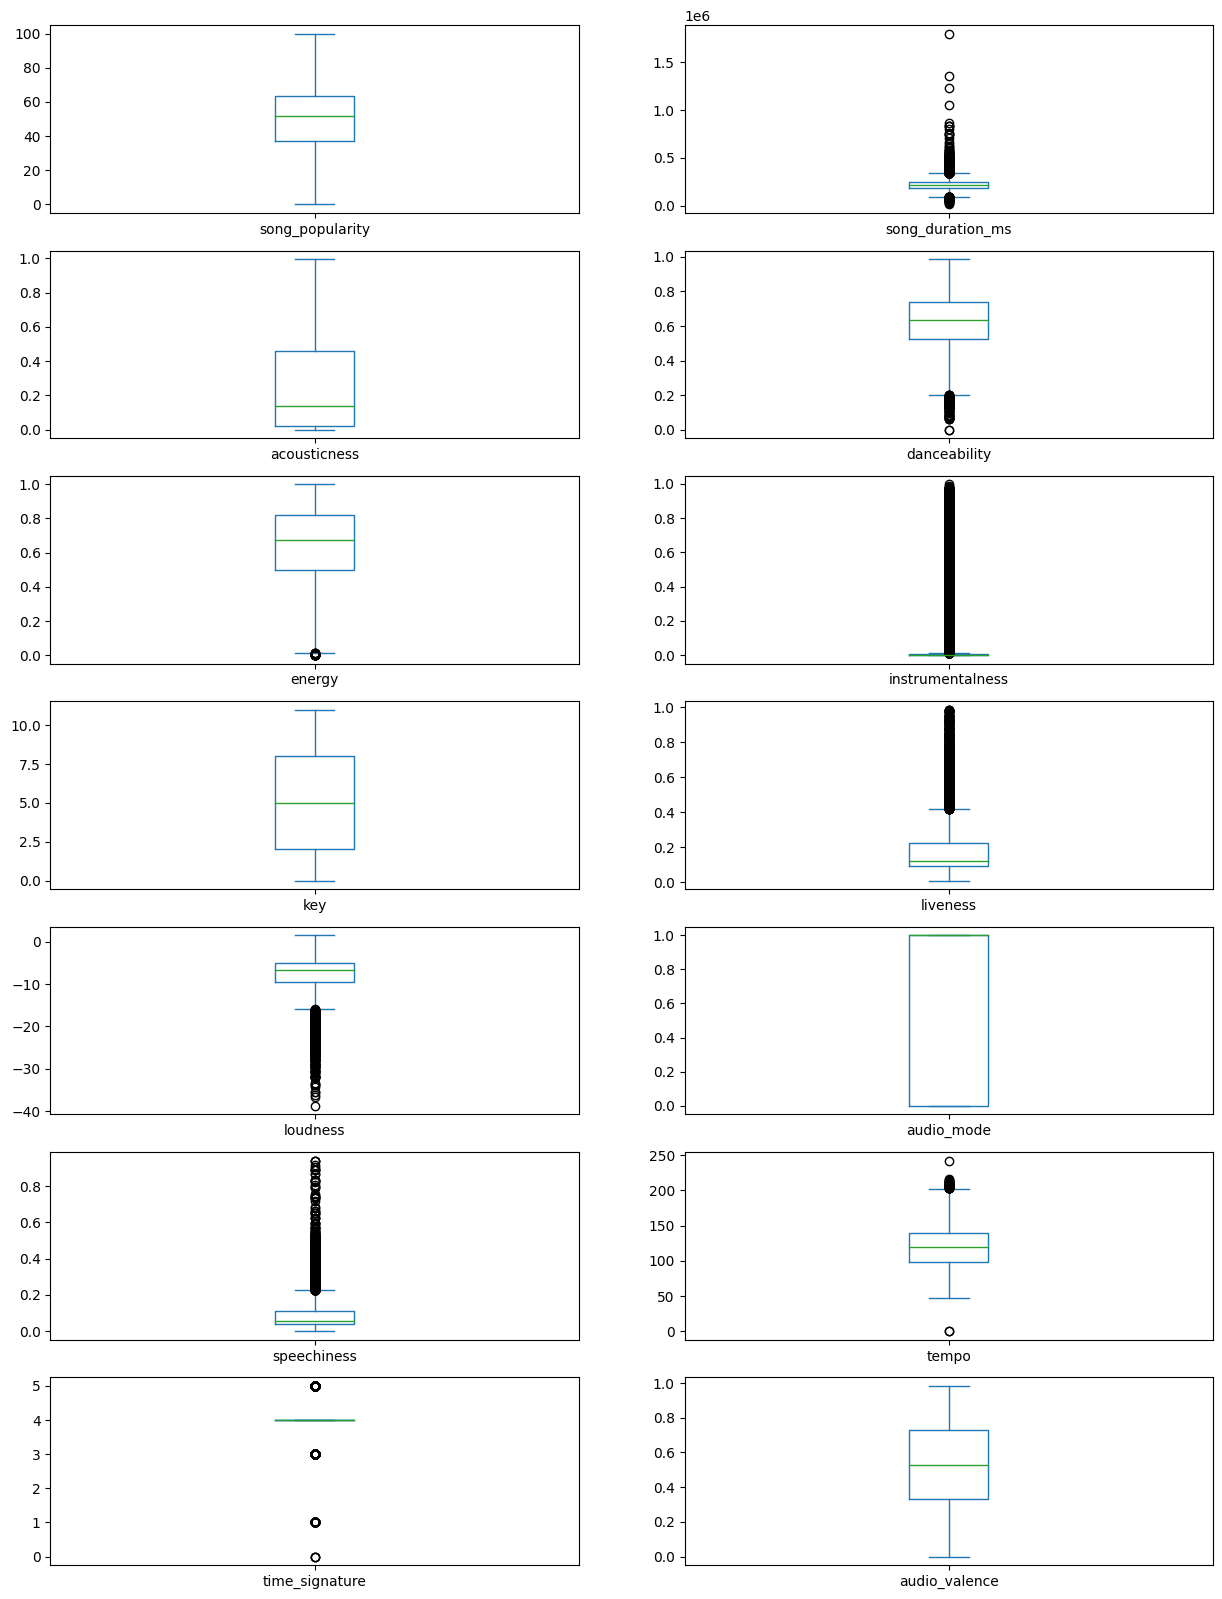

In [19]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [20]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [21]:
df1 = treat_outliers_all(df1 , df1.columns.to_list())

In [22]:
df1.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,14926.000000,14926.000000,14926.00000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.0,14926.000000
mean,48.750904,216417.425248,0.270453,0.62490,0.639782,0.003248,5.301152,0.168618,-7.494694,0.631917,0.086201,121.089775,4.0,0.526967
std,20.379465,50386.159014,0.298117,0.15693,0.221700,0.005251,3.592616,0.108528,3.388674,0.482300,0.067292,28.967841,0.0,0.247758
min,0.000000,92778.750000,0.000001,0.20000,0.013000,0.000000,0.000000,0.010900,-15.987250,0.000000,0.000000,35.401375,4.0,0.000000
25%,37.000000,183943.500000,0.023600,0.52400,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.0,0.332000
50%,52.000000,211845.500000,0.139000,0.63600,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.0,0.527000
75%,63.750000,244720.000000,0.458000,0.74000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.0,0.727750
max,100.000000,335884.750000,0.996000,0.98700,0.999000,0.012762,11.000000,0.420500,1.585000,1.000000,0.226700,202.664375,4.0,0.984000


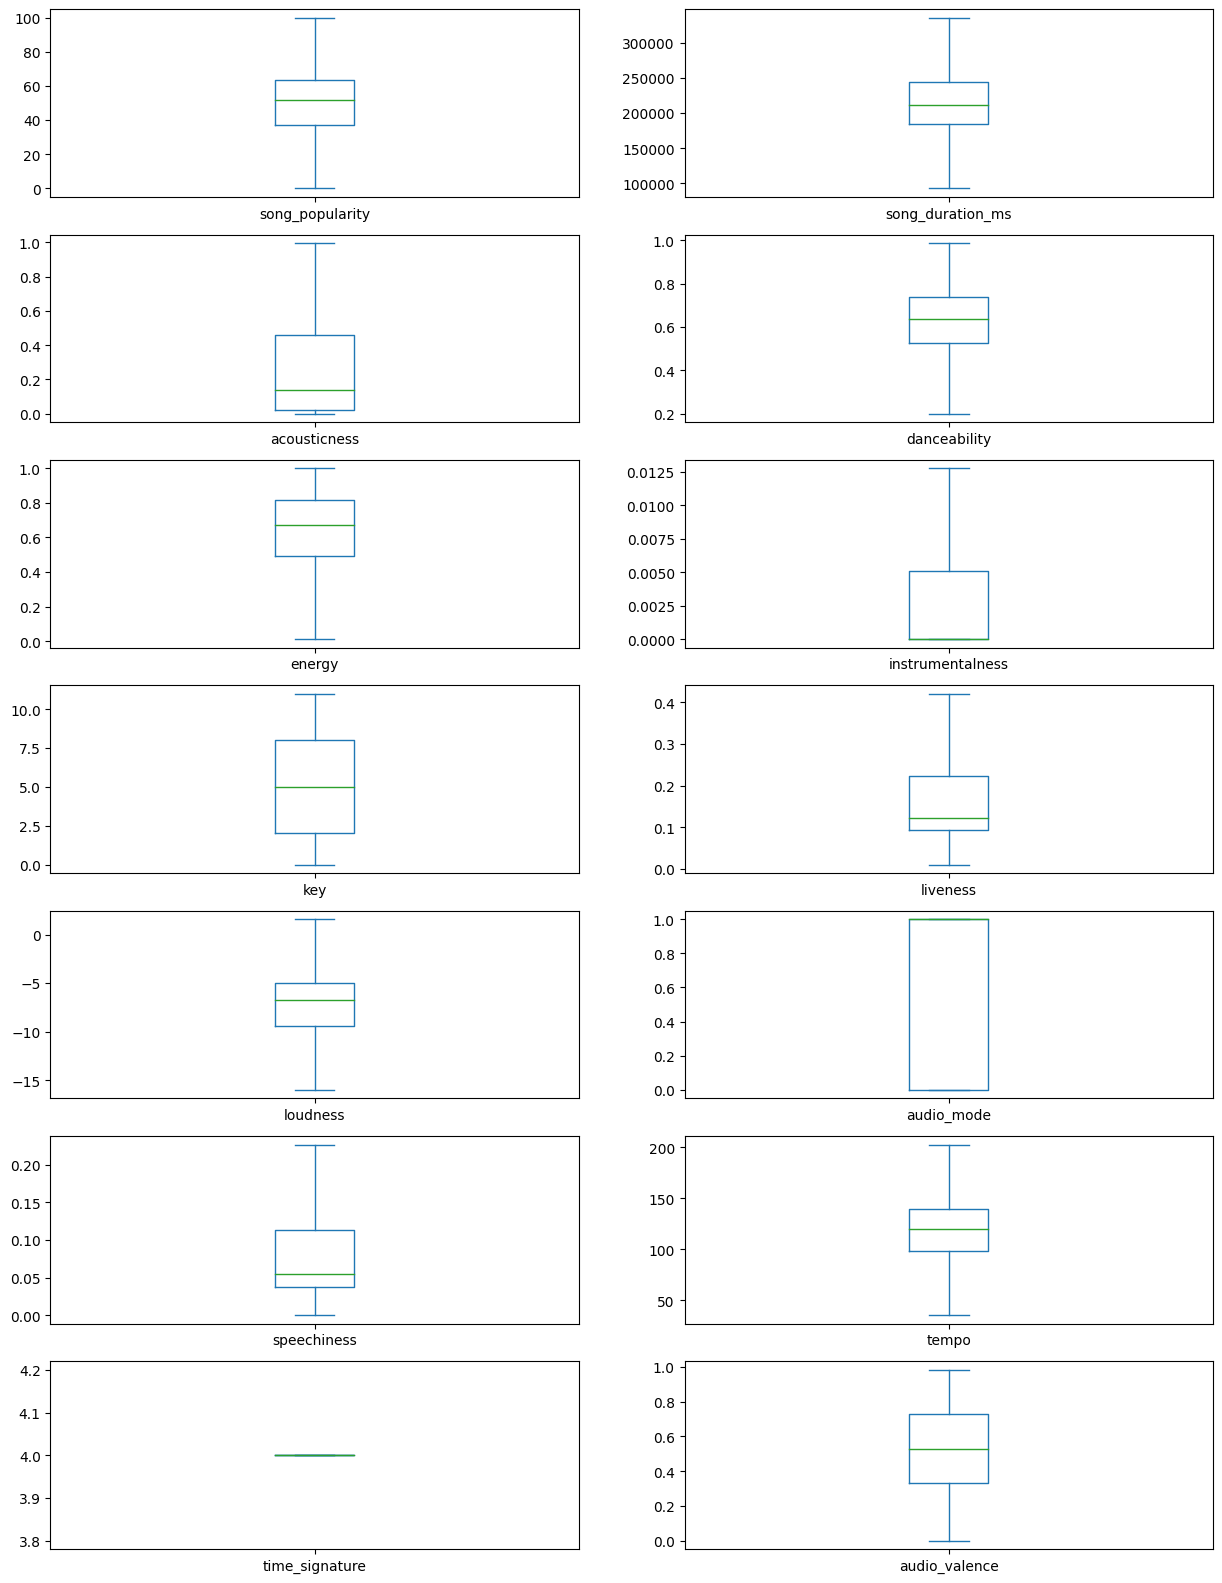

In [23]:
df1.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [24]:
df1.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733.0,0.008170,0.737,0.463,0.012762,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


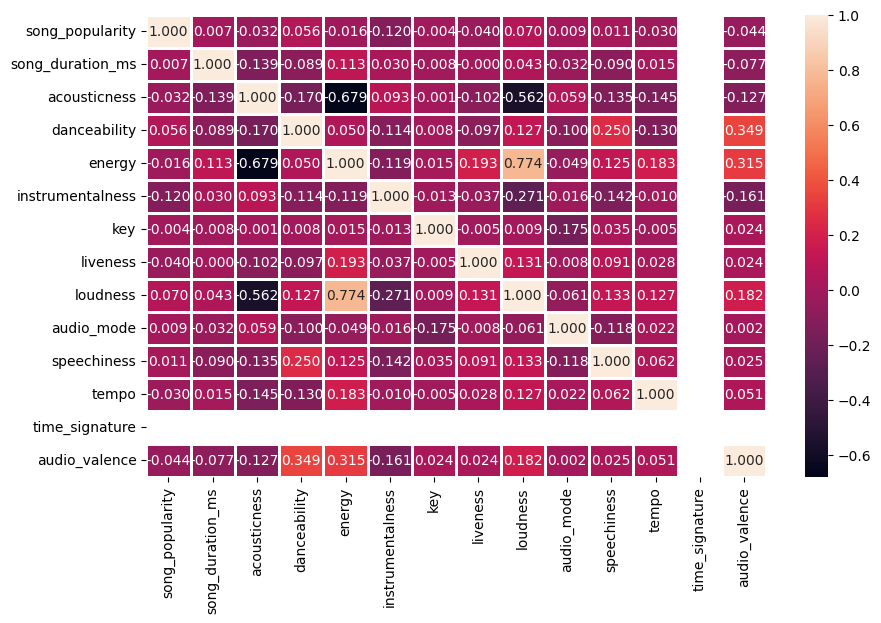

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,fmt='.3f',linewidths=2)
plt.show()

array([[<AxesSubplot: title={'center': 'song_popularity'}>,
        <AxesSubplot: title={'center': 'song_duration_ms'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'audio_mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'tempo'}>],
       [<AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'audio_valence'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

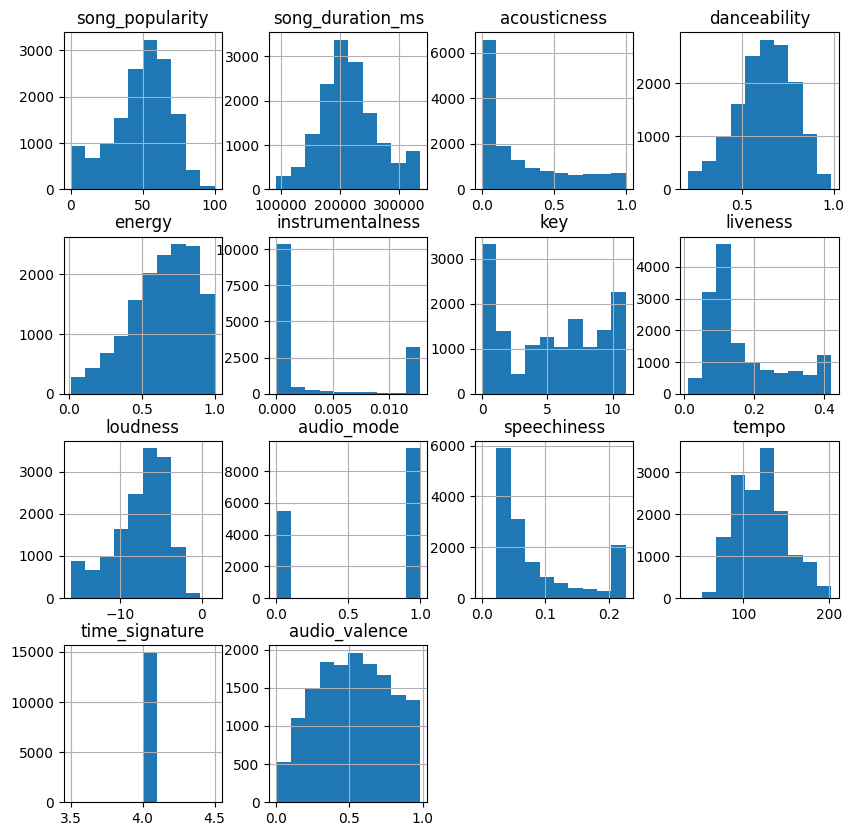

In [26]:
df1.hist(figsize=(10,10))

Train Test Split!

In [27]:
X = df1.drop('song_popularity',axis=1)
y = df1.song_popularity

X.shape, y.shape

((14926, 13), (14926,))

In [28]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11940, 13), (2986, 13), (11940,), (2986,))

In [29]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [32]:
y_pred_lin = reg.predict(X_test)
print(y_pred_lin)

[45.10757838 49.0848809  50.52492738 ... 50.53957318 44.74170783
 53.62894605]


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 15.88
Root Mean Square Error: 19.978
R2 Score: 0.028


Linear Model very bad!

Random Forest

We need to scale for RF

In [35]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [36]:
X_train_RF.shape, X_test_RF.shape

((11940, 13), (2986, 13))

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
y_pred_RF = rf.predict(X_test_RF)
print(y_pred_RF)

[50.5 50.3 55.8 ... 53.8 53.6 56.7]


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 16.668
Root Mean Square Error: 20.959
R2 Score: -0.07


With 100 trees

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
y_pred_RF_100 = rf.predict(X_test_RF)
print(y_pred_RF_100)

[51.64       52.37       56.67       ... 44.17166667 43.38
 51.745     ]


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 15.988
Root Mean Square Error: 20.219
R2 Score: 0.005


RF also very bad!

CNN

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [52]:
song_model = Sequential()
song_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
song_model.add(Dense(512, activation = "relu"))
song_model.add(Dense(1024, activation = "relu"))
song_model.add(Dropout(0.2))
song_model.add(Dense(1024, activation = "relu"))
song_model.add(Dense(512, activation = "relu"))
song_model.add(Dense(256, activation = "relu"))
song_model.add(Flatten())
song_model.add(Dense(512, activation = "relu"))
song_model.add(Dropout(0.5))
song_model.add(Dense(512, activation = "relu"))
song_model.add(Dropout(0.5))
song_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
song_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [53]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
song_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [54]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [55]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='songmodel.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [56]:
history=song_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


67/75 [=========================>....] - ETA: 0s - loss: 23.5780 - mean_absolute_error: 23.5511
Epoch 1: val_loss improved from inf to 17.40362, saving model to songmodel.h5
75/75 [==============================] - 3s 8ms/step - loss: 22.9762 - mean_absolute_error: 22.9494 - val_loss: 17.4036 - val_mean_absolute_error: 17.3786
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 16.8690 - mean_absolute_error: 16.8449
Epoch 2: val_loss improved from 17.40362 to 16.71253, saving model to songmodel.h5
75/75 [==============================] - 0s 4ms/step - loss: 16.8690 - mean_absolute_error: 16.8449 - val_loss: 16.7125 - val_mean_absolute_error: 16.6893
Epoch 3/100
57/75 [=====================>........] - ETA: 0s - loss: 16.9192 - mean_absolute_error: 16.8966
Epoch 3: val_loss improved from 16.71253 to 15.93623, saving model to songmodel.h5
75/75 [==============================] - 0s 4ms/step - loss: 16.9079 - mean_absolute_error: 16.8854 - val_loss: 15.9362 - val_mean_abs

In [57]:
y_pred_cnn = song_model.predict(X_test_RF)
print(y_pred_cnn)

94/94 [==============================] - 0s 1ms/step
[[57.241745]
 [46.3423  ]
 [49.20481 ]
 ...
 [53.669903]
 [48.111485]
 [56.38383 ]]


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 15.59
Root Mean Square Error: 19.845
R2 Score: 0.041


In [68]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results, cnn_results])
results

,MAE,RMSE,R-Square
Linear Regression,15.879982,19.978002,0.028116
Random Forest-10,16.667672,20.959455,-0.069721
Random Forest-100,15.988165,20.219156,0.004511
CNN,15.590350,19.845451,0.040969


There's still error! Would continue work on data preprocessing later!